<a href="https://colab.research.google.com/github/Marisol00278/Alura_Store_Challenge/blob/main/AluraStoreChallenge2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Alura Store Challenge**


### **Importación de datos**



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
#Unir las cuatro bases de datos en una sola
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index =True)

tiendas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [72]:
ingreso_total_tienda_1 = tienda["Precio"].mean()
ingreso_total_tienda_2 = tienda2["Precio"].mean()
ingreso_total_tienda_3 = tienda3["Precio"].mean()
ingreso_total_tienda_4 = tienda4["Precio"].mean()

print("ingreso total Tienda 1:", ingreso_total_tienda_1)
print("ingreso total Tienda 2:", ingreso_total_tienda_2)
print("ingreso total Tienda 3:", ingreso_total_tienda_3)
print("ingreso total Tienda 4:", ingreso_total_tienda_4)

ingreso total Tienda 1: 487867.9101314116
ingreso total Tienda 2: 473227.42687579483
ingreso total Tienda 3: 465459.7710894447
ingreso total Tienda 4: 440362.89228159457


In [6]:
ingreso_por_categoria = tiendas.groupby("Categoría del Producto")["ingreso_total"].sum().sort_values(ascending=False)

print(ingreso_por_categoria)

Categoría del Producto
Electrónicos               1.749039e+09
Electrodomésticos          1.395147e+09
Muebles                    7.981114e+08
Instrumentos musicales     3.672769e+08
Deportes y diversión       1.506693e+08
Juguetes                   7.762570e+07
Artículos para el hogar    6.069090e+07
Libros                     3.975600e+07
Name: ingreso_total, dtype: float64


# 2. Ventas por categoría

In [10]:
ventas_por_categoria = tiendas.groupby("Categoría del Producto")["Producto"].count().reset_index(name="Cantidad Vendida")

In [11]:

ventas_por_categoria = ventas_por_categoria.sort_values(by="Cantidad Vendida", ascending=False)

print(ventas_por_categoria)

    Categoría del Producto  Cantidad Vendida
7                  Muebles              1886
3             Electrónicos              1772
5                 Juguetes              1290
2        Electrodomésticos              1149
1     Deportes y diversión              1113
4   Instrumentos musicales               753
6                   Libros               742
0  Artículos para el hogar               730


# 3. Calificación promedio de la tienda


In [12]:
valoracion_tienda_1 = tienda["Calificación"].mean()
valoracion_tienda_2 = tienda2["Calificación"].mean()
valoracion_tienda_3 = tienda3["Calificación"].mean()
valoracion_tienda_4 = tienda4["Calificación"].mean()

In [16]:
print("Valoracion promedio tienda 1:", valoracion_tienda_1)
print("Valoracion promedio tienda 2:", valoracion_tienda_2)
print("Valoracion promedio tienda 3:", valoracion_tienda_3)
print("Valoracion promedio tienda 4:", valoracion_tienda_4)

Valoracion promedio tienda 1: 3.976685036032217
Valoracion promedio tienda 2: 4.037303942348453
Valoracion promedio tienda 3: 4.048325561678677
Valoracion promedio tienda 4: 3.9957591178965224


# 4. Productos más y menos vendidos

In [14]:

productos_tienda_1 = tienda.groupby("Producto")["Producto"].count().reset_index(name="Cantidad Vendida")
productos_tienda_2 = tienda2.groupby("Producto")["Producto"].count().reset_index(name="Cantidad Vendida")
productos_tienda_3 = tienda3.groupby("Producto")["Producto"].count().reset_index(name="Cantidad Vendida")
productos_tienda_4 = tienda4.groupby("Producto")["Producto"].count().reset_index(name="Cantidad Vendida")

In [15]:

print("Productos más vendidos tienda 1:")
print(productos_tienda_1.sort_values(by="Cantidad Vendida", ascending=False).head())

print("\n Productos más vendidos tienda 2:")
print(productos_tienda_2.sort_values(by="Cantidad Vendida", ascending=False).head())

print("\n Productos más vendidos tienda 3:")
print(productos_tienda_3.sort_values(by="Cantidad Vendida", ascending=False).head())

print("\n Productos más vendidos tienda 4:")
print(productos_tienda_4.sort_values(by="Cantidad Vendida", ascending=False).head())

Productos más vendidos tienda 1:
            Producto  Cantidad Vendida
1            Armario                60
48     TV LED UHD 4K                60
33        Microondas                60
40  Secadora de ropa                58
32     Mesa de noche                56

 Productos más vendidos tienda 2:
                     Producto  Cantidad Vendida
24  Iniciando en programación                65
33                 Microondas                62
7                     Batería                61
38                  Pandereta                58
21          Guitarra acústica                58

 Productos más vendidos tienda 3:
           Producto  Cantidad Vendida
27    Kit de bancas                57
31  Mesa de comedor                56
11        Cama king                56
41     Set de ollas                55
32    Mesa de noche                55

 Productos más vendidos tienda 4:
                     Producto  Cantidad Vendida
10                   Cama box                62
15              

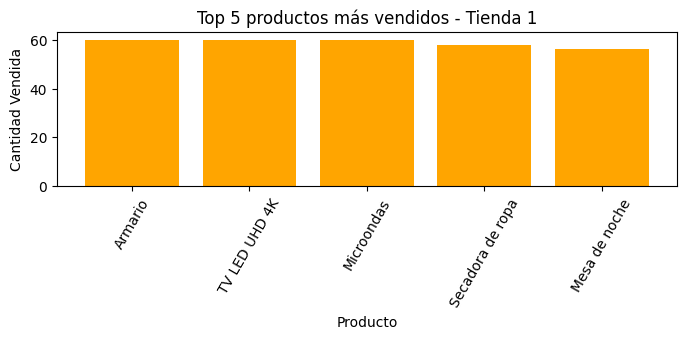

In [41]:
import matplotlib.pyplot as plt

# Tomamos los 5 productos más vendidos de la tienda 1
top5_tienda_1 = productos_tienda_1.sort_values(by="Cantidad Vendida", ascending=False).head(5)

# Creamos un gráfico de barras

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 2))
plt.bar(top5_tienda_1["Producto"], top5_tienda_1["Cantidad Vendida"], color="orange")
plt.title("Top 5 productos más vendidos - Tienda 1")
plt.xlabel("Producto")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=60)
plt.show()

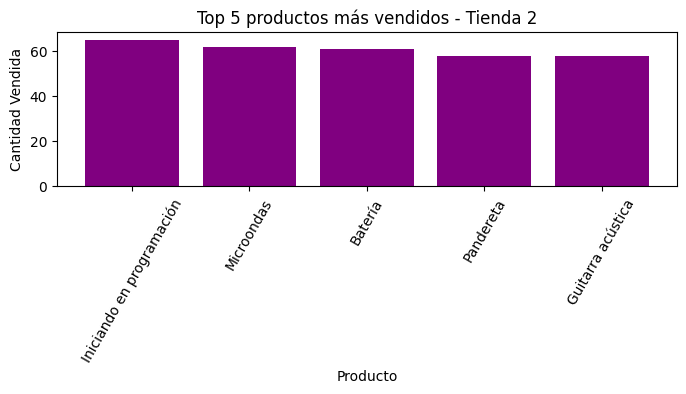

In [43]:

top5_tienda_2 = productos_tienda_2.sort_values(by="Cantidad Vendida", ascending=False).head(5)

# Creamos un gráfico de barras
plt.figure(figsize=(8, 2))
plt.bar(top5_tienda_2["Producto"], top5_tienda_2["Cantidad Vendida"], color="purple")
plt.title("Top 5 productos más vendidos - Tienda 2")
plt.xlabel("Producto")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=60)
plt.show()

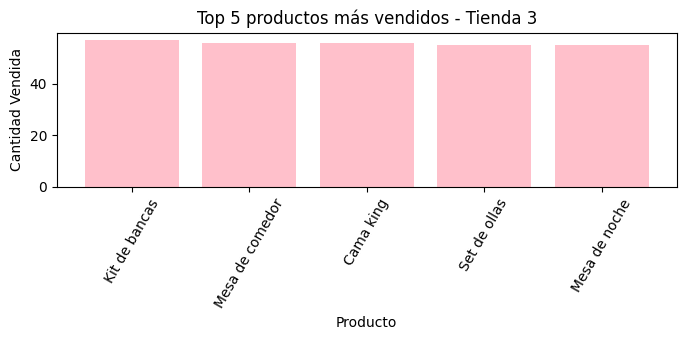

In [45]:
top5_tienda_3 = productos_tienda_3.sort_values(by="Cantidad Vendida", ascending=False).head(5)

# Creamos un gráfico de barras
plt.figure(figsize=(8, 2))
plt.bar(top5_tienda_3["Producto"], top5_tienda_3["Cantidad Vendida"], color="pink")
plt.title("Top 5 productos más vendidos - Tienda 3")
plt.xlabel("Producto")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=60)
plt.show()


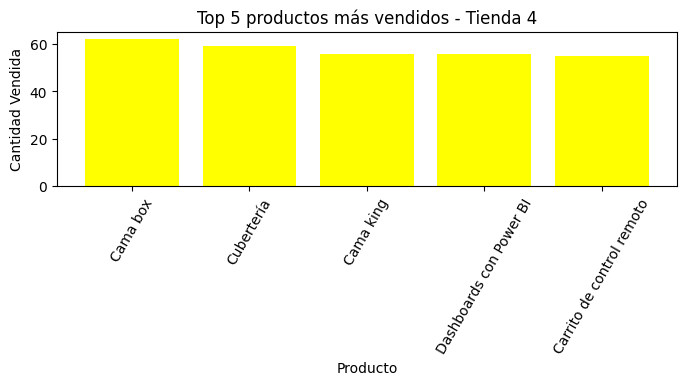

In [47]:
top5_tienda_4 = productos_tienda_4.sort_values(by="Cantidad Vendida", ascending=False).head(5)

# Creamos un gráfico de barras
plt.figure(figsize=(8, 2))
plt.bar(top5_tienda_4["Producto"], top5_tienda_4["Cantidad Vendida"], color="yellow")
plt.title("Top 5 productos más vendidos - Tienda 4")
plt.xlabel("Producto")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=60)
plt.show()

# 5. Envío promedio por tienda

In [48]:

envio_promedio_tienda_1 = tienda["Costo de envío"].mean()
envio_promedio_tienda_2 = tienda2["Costo de envío"].mean()
envio_promedio_tienda_3 = tienda3["Costo de envío"].mean()
envio_promedio_tienda_4 = tienda4["Costo de envío"].mean()

print("Envío promedio Tienda:", envio_promedio_tienda_1)
print("Envío promedio Tienda:", envio_promedio_tienda_2)
print("Envío promedio Tienda:", envio_promedio_tienda_3)
print("Envío promedio Tienda:", envio_promedio_tienda_4)

Envío promedio Tienda: 26018.60958033065
Envío promedio Tienda: 25216.235693090293
Envío promedio Tienda: 24805.680373039424
Envío promedio Tienda: 23459.457167090754


In [49]:

import pandas as pd

promedios_envio= pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4",],
    "Envío promedio": [envio_promedio_tienda_1, envio_promedio_tienda_2, envio_promedio_tienda_3, envio_promedio_tienda_4]
})

print(promedios_envio)

     Tienda  Envío promedio
0  Tienda 1    26018.609580
1  Tienda 2    25216.235693
2  Tienda 3    24805.680373
3  Tienda 4    23459.457167


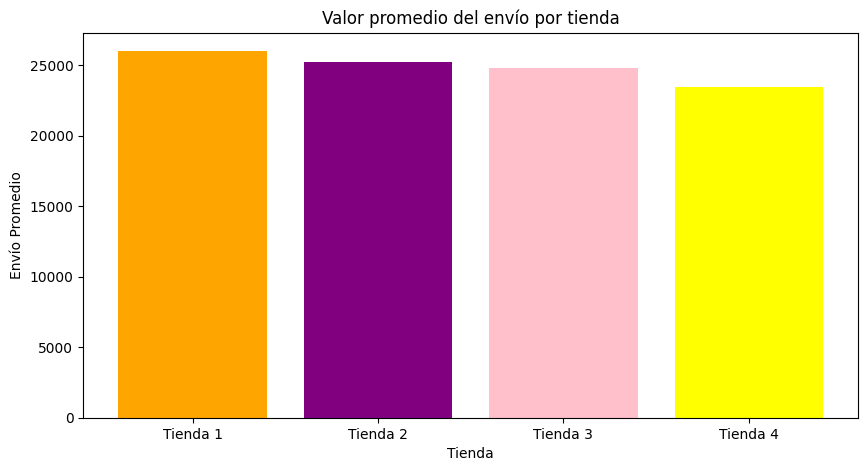

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(promedios_envio["Tienda"], promedios_envio["Envío promedio"], color=["orange","purple","pink","yellow"])
plt.title("Valor promedio del envío por tienda")
plt.xlabel("Tienda")
plt.ylabel("Envío Promedio")
plt.show()

# 5.1 Generando Gráficos

### **5.1.1 Categorías más vendidas**

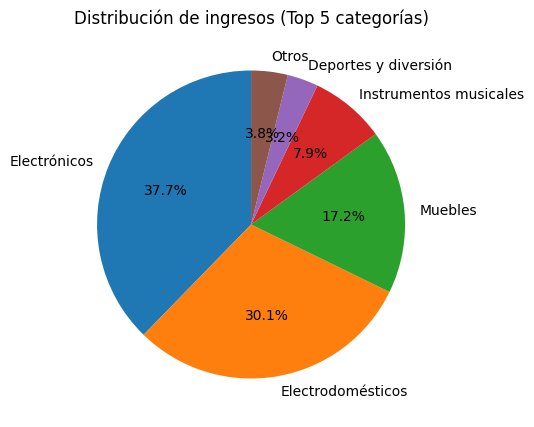

In [51]:
top_categorias = ingreso_por_categoria.sort_values(ascending=False).head(5)
otros = ingreso_por_categoria.sum() - top_categorias.sum()

top_categorias["Otros"] = otros

plt.figure(figsize=(5,5))
plt.pie(
    top_categorias,
    labels=top_categorias.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribución de ingresos (Top 5 categorías)")
plt.show()

### **5.1.2 Valoración Promedio por Tienda**

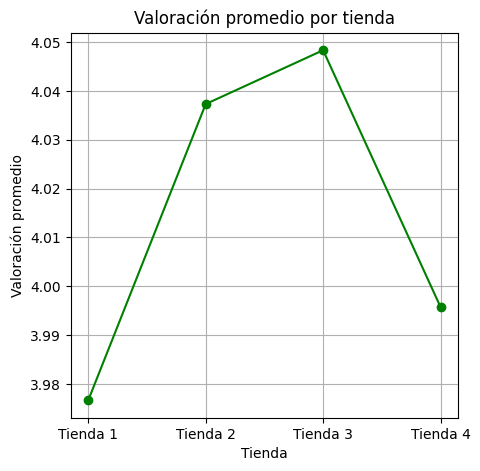

In [52]:

valoraciones = [valoracion_tienda_1, valoracion_tienda_2, valoracion_tienda_3, valoracion_tienda_4]
tiendas_nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

plt.figure(figsize=(5,5))
plt.plot(tiendas_nombres, valoraciones, marker='o', linestyle='-', color='green')
plt.title("Valoración promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Valoración promedio")
plt.grid(True)
plt.show()


### **5.1.3 Análisis de desempeño Geográfico**

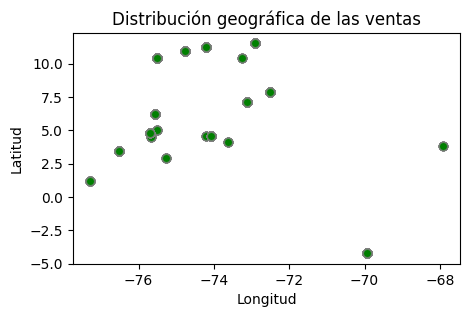

In [58]:

import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.scatter(tiendas["lon"], tiendas["lat"], c="green", alpha=0.6, edgecolors="gray")
plt.title("Distribución geográfica de las ventas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

La visualización muestra cómo se distribuyen las ventas según la ubicación geográfica de los clientes.

Se observa que hay una mayor concentración de puntos en ciertas áreas, lo que indica una mayor actividad comercial en esas regiones.

Este tipo de análisis puede ayudar a identificar zonas con alto potencial de ventas o regiones donde sería conveniente reforzar la estrategia comercial.

## **6. Informe Final**

###### El presente análisis tuvo como objetivo identificar cuál de las cuatro tiendas representa la mejor oportunidad de venta para el Sr. Juan.

###### A partir de los datos proporcionados, se analizaron aspectos clave como los ingresos totales, las categorías de productos más vendidas, la valoración de los clientes, los costos de envío y los productos con mayor demanda.

##### A través del uso de Python y visualizaciones con Matplotlib, se buscó obtener una visión clara del desempeño de cada tienda y determinar cuál ofrece mejores resultados comerciales y cuál de las 4 tiendas tiene un menor desempeño.


### **6.1 Ingresos Totales**

La **Tienda 1** fue la que generó mayores ingresos, seguida de la **Tienda 2**.

Esto muestra que la Tienda 1 tiene una mayor capacidad de venta y un volumen de clientes más alto.

### **6.2 Categorías más vendidas:**

###### Se pudo corroborar que la categoría de **Electrónica** es la más vendida en general entre las 4 tiendas, mientras que **Deportes, Diversión y Otros** son las categorías menos vendidas. Esto indica que los productos tecnológicos son los que tienen más demanda entre los clientes.

### **6.3 Valoraciones Promedio**

Valoraciones promedio:
En cuanto a las opiniones de los clientes, la **Tienda 3** fue la mejor valorada, lo cual refleja una buena experiencia de compra, y la **Tienda 1** es la que ha recibido menos puntuación.


### **6.4 Productos más vendidos**

Los gráficos mostraron que los productos tecnológicos (como smartphones, computadoras, televisores) fueron los más vendidos entre las 4 tiendas, seguido por los artículos de uso doméstico.

### **6.5 Costo de envío promedio**

La **Tienda 1** presentó el costo de envío más alto, lo que podría ser un indicativo de análisis para replantearse si la ubicación de la tienda es estratégica o no, pues también es la tienda con menos valoración de los clientes, esto hay que analizar para poder generar una mejor experiencia en compras del cliente.



## **📊7. Conclusión**

Tras analizar los resultados obtenidos, se concluye que la **Tienda 1** es la opción más conveniente en ventas para el Sr. Juan, es por ello que sugiero un estudio geográfico y ver la posibilidad de trasladar la tienda a una mejor ubicación, es decir a una buena ubicación estratégica y comercial, pues tiene la posibilidad de expandir sus operaciones, y así reducir costo de envíos, y ofrecer una mejor experiencia en compra a sus clientes.

Aunque la **Tienda 4** tiene una valoración regular de los clientes, presenta el costo de envío más bajo, es la tienda que tiene el **nivel más bajo en ventas**, quiere decir que mercado es limitado y no habrá la opción de expandirse, pues su nivel de facturación inferior en comparación de las otras 3 tiendas, **este análisis puede sugerir la posibilidad de que el Sr. Juan pueda vender la Tienda 4 e invertir en un nuevo negocio.**


